In [1]:
import torch
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

IMDB Real node features

In [2]:
real_feature_path = '../features/imdb/real_node_features15.pt'
real_class_path = '../features/imdb/real_node_class15.pt'
syn_feature_path = '../features/imdb/sync131870233442/sync131870233442_node_features15.pt'
syn_class_path = '../features/imdb/sync131870233442/sync131870233442_node_class15.pt'

In [3]:
def apply_threshold(df):
    return df.applymap(lambda x: 0.0 if x<0.0 else 1.0)

In [4]:
def cosine_sim(original,sampled):
    return cosine_similarity(np.array(original), np.array(sampled))

In [5]:
node_feature_real = torch.load(real_feature_path).detach().numpy()
node_feature_real.shape

(15, 3066)

In [6]:
df_real = pd.DataFrame(node_feature_real)
node_class_real = torch.load(real_class_path).detach().numpy()
node_class_real

array([0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2])

In [7]:
df_real['class'] = node_class_real

In [8]:
node_feature_syn = torch.load(syn_feature_path).detach().numpy()
node_feature_syn.shape

(15, 3066)

In [9]:
node_class_syn = torch.load(syn_class_path).detach().numpy()
node_class_syn

array([2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1])

In [10]:
df_syn = pd.DataFrame(node_feature_syn)
df_syn['class'] = node_class_syn

In [11]:
class1_real = df_real[df_real['class'] == 1].drop(['class'], axis = 1)
class1_real

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
class1_syn = df_syn[df_syn['class'] == 1].drop(['class'], axis = 1)
class1_syn_discrete = apply_threshold(class1_syn)
class1_syn_discrete

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
10,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
14,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


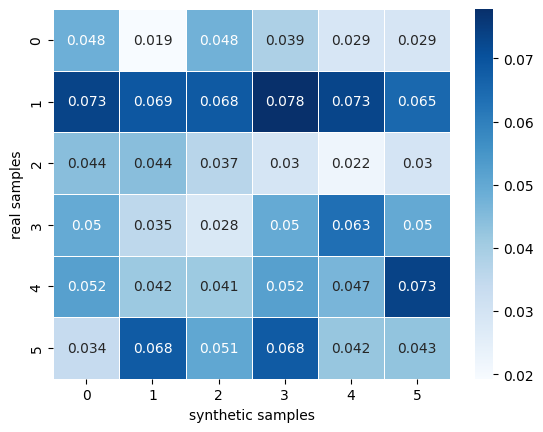

In [13]:
sns.heatmap(cosine_sim(class1_real,class1_syn_discrete), 
            xticklabels = 1, yticklabels = 1,annot =True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()